In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [18]:
data = pd.read_csv('Advertising.csv')

In [19]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [20]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [21]:
# 一元线性回归
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print('coef:',model.coef_)
print('intercept:',model.intercept_)
print('score:',model.score(X,y))

coef: [[0.04753664]]
intercept: [7.03259355]
score: 0.611875050850071


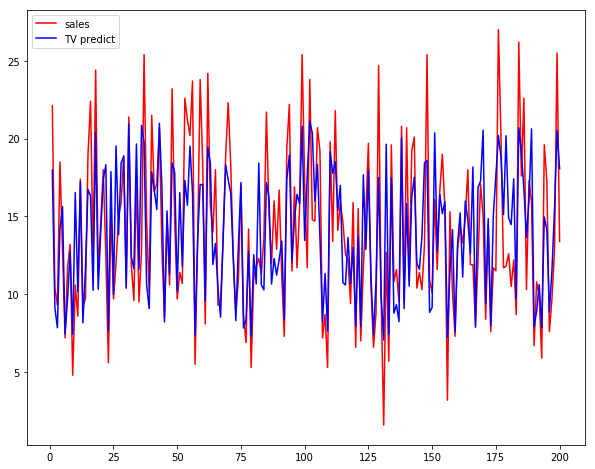

In [23]:
plt.figure(figsize=(10,8))
plt.plot(data.index,data['sales'],color='red',label='sales')
plt.plot(data.index,model.predict(X),color='blue',label='TV predict')
plt.legend(loc='best')
plt.show()

使用一元线性回归的效果不是很理想，因为决定系数不太理性。  

In [24]:
# 计算一元线性回归每个参数的P值
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        19:45:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [25]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
# 使用多元线性回归
X = data[['TV','radio','newspaper']].values
y = data['sales'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
print('coef:',model.coef_)
print('intercept:',model.intercept_)
print('score:',model.score(X,y))

coef: [[ 0.04576465  0.18853002 -0.00103749]]
intercept: [2.93888937]
score: 0.8972106381789521


In [27]:
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        19:45:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

第三个参数的P值没有达到显著性要求，说明这个维度不重要，可以去掉

In [28]:
# 使用多元线性回归，去掉newspaper维度
X = data[['TV','radio']].values
y = data['sales'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
print('coef:',model.coef_)
print('intercept:',model.intercept_)
print('score:',model.score(X,y))

coef: [[0.04575482 0.18799423]]
intercept: [2.92109991]
score: 0.8971942610828956


In [29]:
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           4.83e-98
Time:                        19:45:47   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

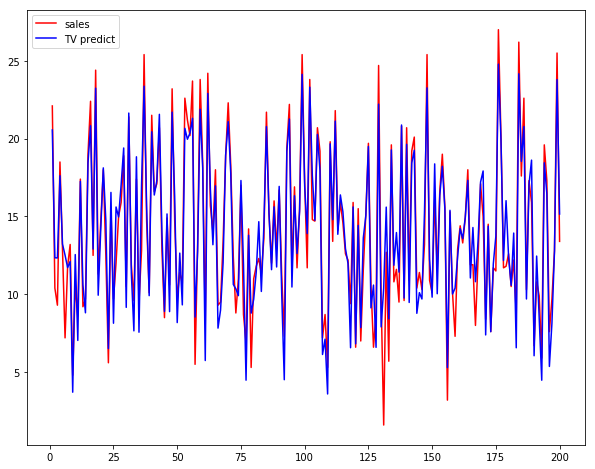

In [30]:
plt.figure(figsize=(10,8))
plt.plot(data.index,data['sales'],color='red',label='sales')
plt.plot(data.index,model.predict(X),color='blue',label='TV predict')
plt.legend(loc='best')
plt.show()

可以看到，去掉newspaper维度后，决定系数变化非常小

使用多元线性回归和一元线性回归没有本质的区别。  
最大的区别在于输入X的维度不同。  
* 一元线性回归的X维度为(n,1)
* 3元线性回归的X维度为(n,3)  

**从决定系数来看，多元线性回归效果好于一元线性回归**